<a href="https://colab.research.google.com/github/felipe-parodi/QuantTools4Neuro/blob/master/PCA_k_means_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline

%load_ext google.colab.data_table

### Lab 1 from ISLR on Principal Components Analysis

In [ ]:
df = pd.read_csv('/content/USArrests.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [ ]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [ ]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [ ]:
# Loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, 
                            columns = ['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [ ]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns = ['PC1', 'PC2', 'PC3', 'PC4'],
                                                        index = X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


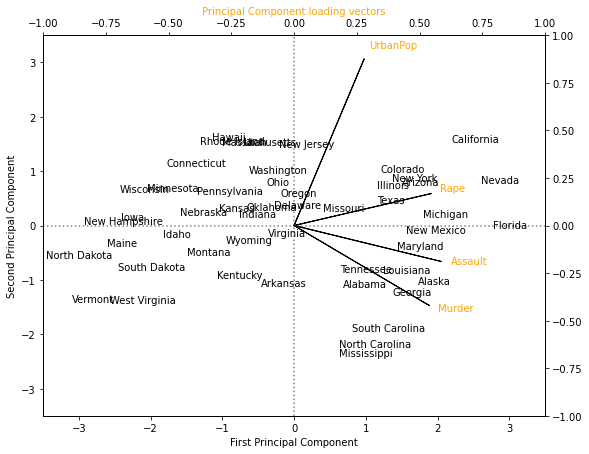

In [ ]:
fig, ax1 = plt.subplots(figsize = (9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot principal components 1 and 2
for i in df_plot.index:
  ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0, -3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot the Principal component loading vectors, using a 2nd y-axis
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. 
# Variable 'a' is a small offset parameter to separate arrow tip and text
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
  ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0, pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0, pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0, pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0, pca_loadings.V1[3], -pca_loadings.V2[3])

In [ ]:
# Standard deviation of the four principal_components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [ ]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [ ]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

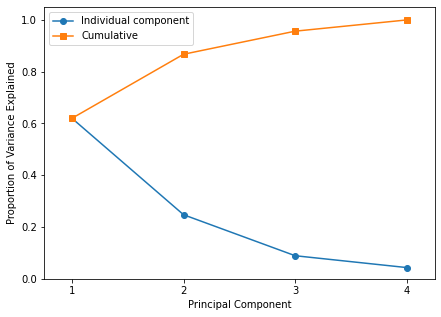

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', 
         label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', 
         label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)

### Lab 2 on K-Means and Hierarchical Clustering

In [19]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50, 2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

# K = 2 clusters
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [21]:
# K = 3 clusters
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
pd.Series(km2.labels_).value_counts()

2    21
1    20
0     9
dtype: int64

In [23]:
km2.cluster_centers_

array([[ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797]])

In [24]:
km2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [26]:
# Sum of distances of samples to their closest cluster center
km2.inertia_

68.97379200939726

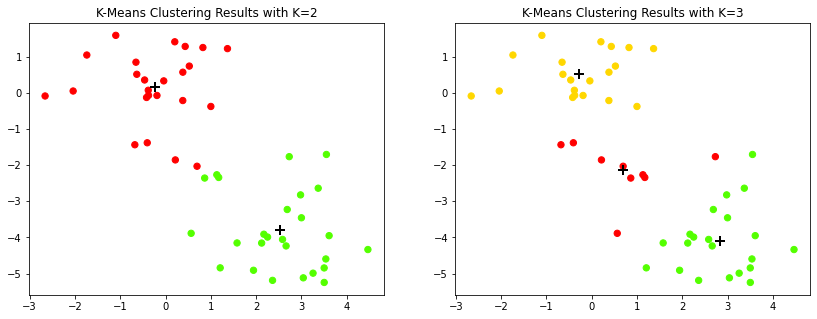

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:, 1], s=40, c=km1.labels_, cmap=plt.cm.prism)
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', 
            s = 100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+',
            s=100, c='k', linewidth=2)

#### Hierarchical Clustering

Text(0.5, 1.0, 'Single Linkage')

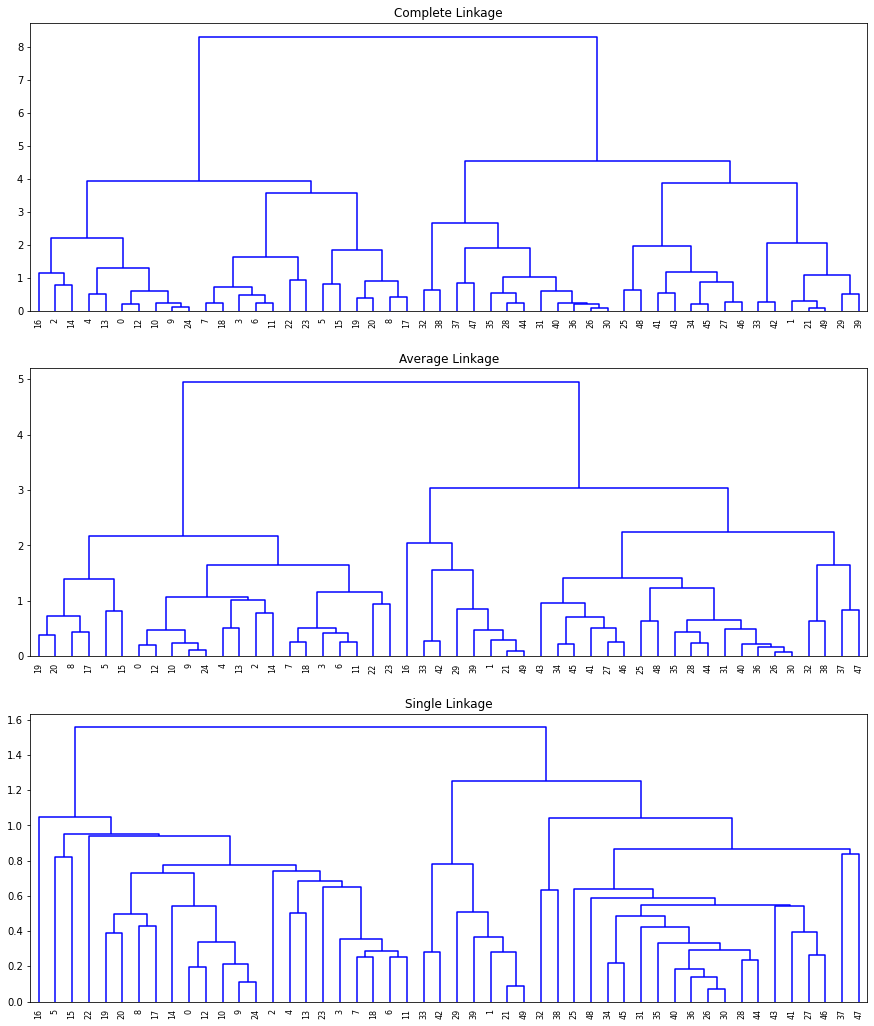

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), 
                                 hierarchy.single(X)], ['c1', 'c2', 'c3'], 
                                [ax1, ax2, ax3]):
  cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')

### Lab 3: NCI60 Data Example

In [29]:
df2 = pd.read_csv('/content/NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [30]:
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [31]:
y = pd.read_csv('/content/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [32]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7A-repro    1
UNKNOWN        1
MCF7D-repro    1
K562A-repro    1
Name: type, dtype: int64

In [33]:
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

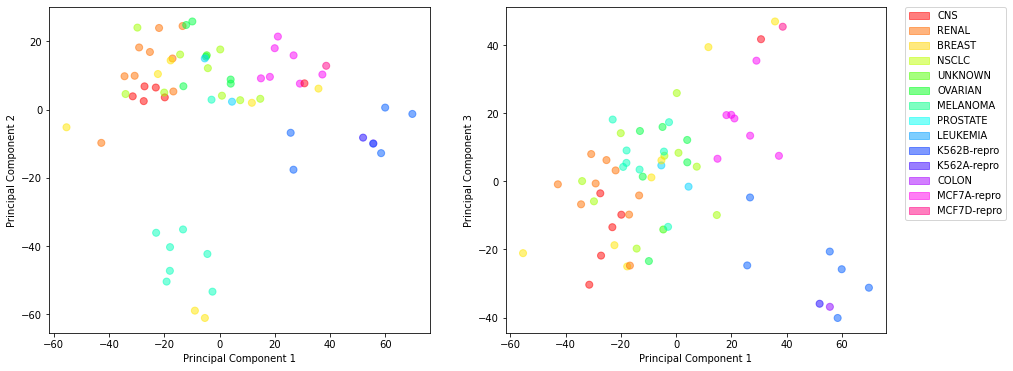

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Left Plot
ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, 
            cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')


# Right Plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, 
            cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom Legened for the classes
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles,bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

# x label for both plots
for ax in fig.axes:
  ax.set_xlabel('Principal Component 1')

In [37]:
df3 = (df2_plot.iloc[:,:5].std(axis=0, ddof=0)).to_numpy()
pd.DataFrame([df3, 
              pca2.explained_variance_ratio_[:5], 
              np.cumsum(pca2.explained_variance_ratio_[:5])], 
             index=['Standard Deviation', 'Proportion of Variance', 
                    'Cumulative Proportion'], 
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

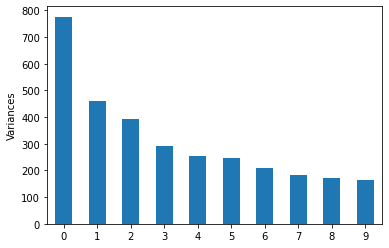

In [38]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

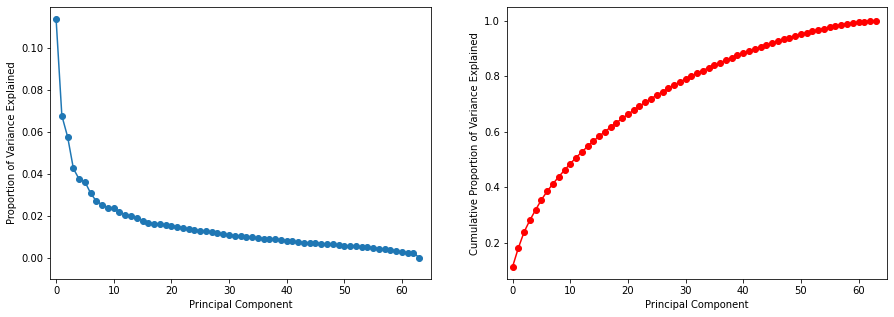

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# left Plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right Plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
  ax.set_xlabel('Principal Component')
  ax.set_xlim(-1,65)

Text(0.5, 1.0, 'Single Linkage')

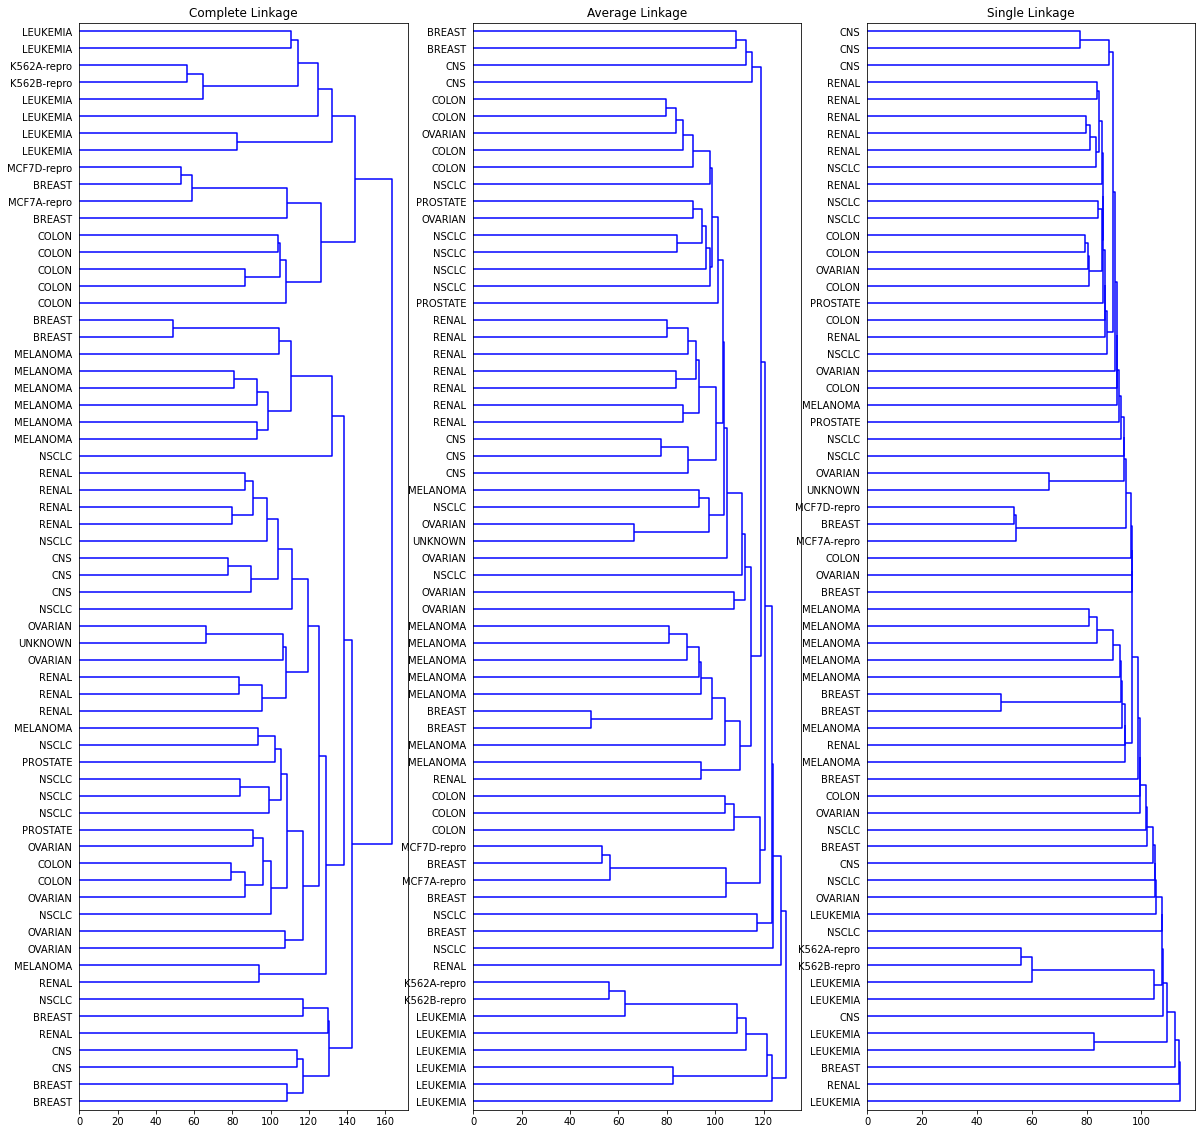

In [40]:
### Clustering
X = pd.DataFrame(scale(df2), index=y.type, columns=df2.columns)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), 
                                 hierarchy.single(X)], 
                                ['c1', 'c2', 'c3'], 
                                [ax1,ax2,ax3]):
  cluster = hierarchy.dendrogram(linkage, labels = X.index, orientation='right', 
                                 color_threshold=0, leaf_font_size=10,
                                 ax=ax)
  
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')

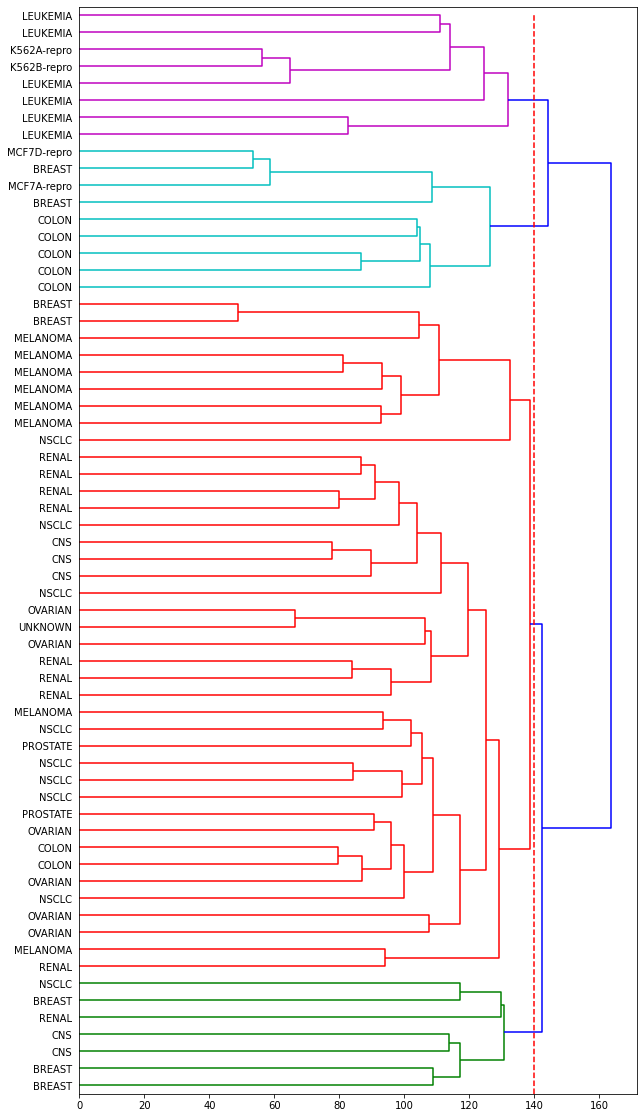

In [42]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X), 
                            labels=X.index, orientation='right', 
                            color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', 
           linestyles='dashed')

In [43]:
### K Means
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(X)

km4.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [44]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts().sort_index()

0    11
1     9
2     9
3    35
dtype: int64

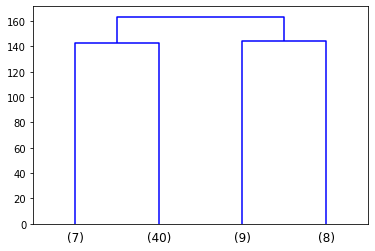

In [45]:
#### Hierarchical
# Observations per hierarchical cluster
cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', 
                             p=4, show_leaf_counts=True)


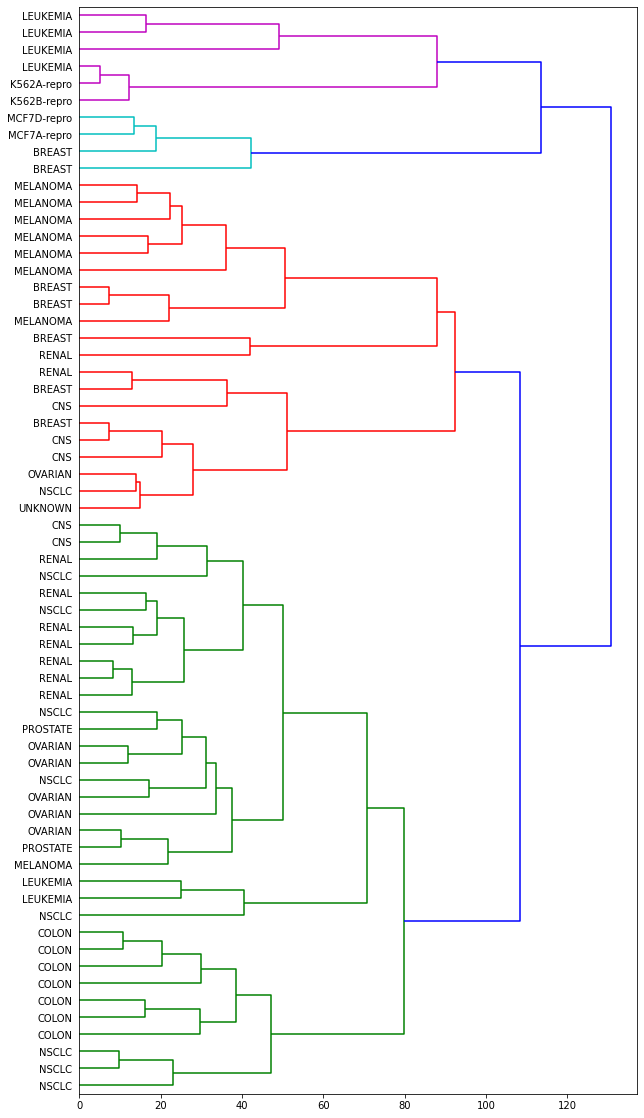

In [47]:
# Hierarchy based on PCs 1-5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), 
                                   labels=y.type.values, orientation='right',
                                   color_threshold=100, leaf_font_size=10)

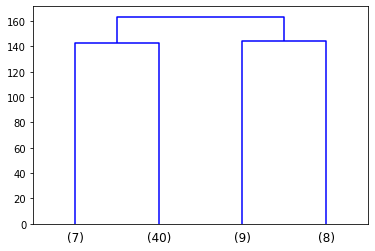

In [48]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df2_plot), 
                             truncate_mode='lastp', p=4, 
                             show_leaf_counts=True)